Project Description:
This project aims to provide additional practice on common software engineering tasks while complementing data skills. The goal is to develop and deploy a web application to a cloud service, making it accessible to the public.

Dataset:
The dataset used in this project is based on car sales advertisements, familiar from previous work.

This project replicates the process outlined in a blog post, focusing on practical implementation and deployment using the Render platform.

In [450]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import streamlit as st
import plotly.express as px
import plotly.colors as colors

In [451]:
df = pd.read_csv('/Users/rafaelhernadez/Documents/PythonProject/Web_app/vehicles_us.csv')

In [452]:
df.shape

(51525, 13)

In [453]:
df.info()  # Get information about the dataset, including data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [454]:
df.head()  # View the first few rows of the dataset

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28

In [455]:
df.describe()  # Generate descriptive statistics for numerical columns

price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750470      6.125235  115553.461738      1.0   
std     10040.803015      6.282065      1.660360   65094.611341      0.0   
min         1.000000   1908.000000      3.000000       0.000000      1.0   
25%      5000.000000   2006.000000      4.000000   70000.000000      1.0   
50%      9000.000000   2011.000000      6.000000  113000.000000      1.0   
75%     16839.000000   2014.000000      8.000000  155000.000000      1.0   
max    375000.000000   2019.000000     12.000000  990000.000000      1.0   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000

In [456]:
# Check for duplicates
duplicate_rows = df.duplicated()

# Print the number of duplicate rows
num_duplicates = duplicate_rows.sum()
num_duplicates

0

In [457]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

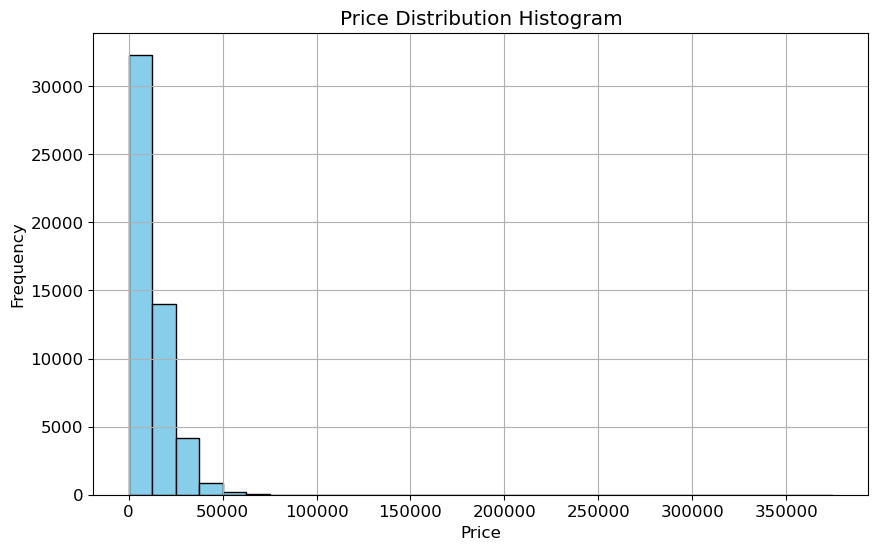

In [458]:
price_stats = df['price'].describe()

# Plot a histogram to visualize the price distribution
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution Histogram')
plt.grid(True)
plt.show()

It seems like there are more cheaper cars available for purchase than luxury cars. 

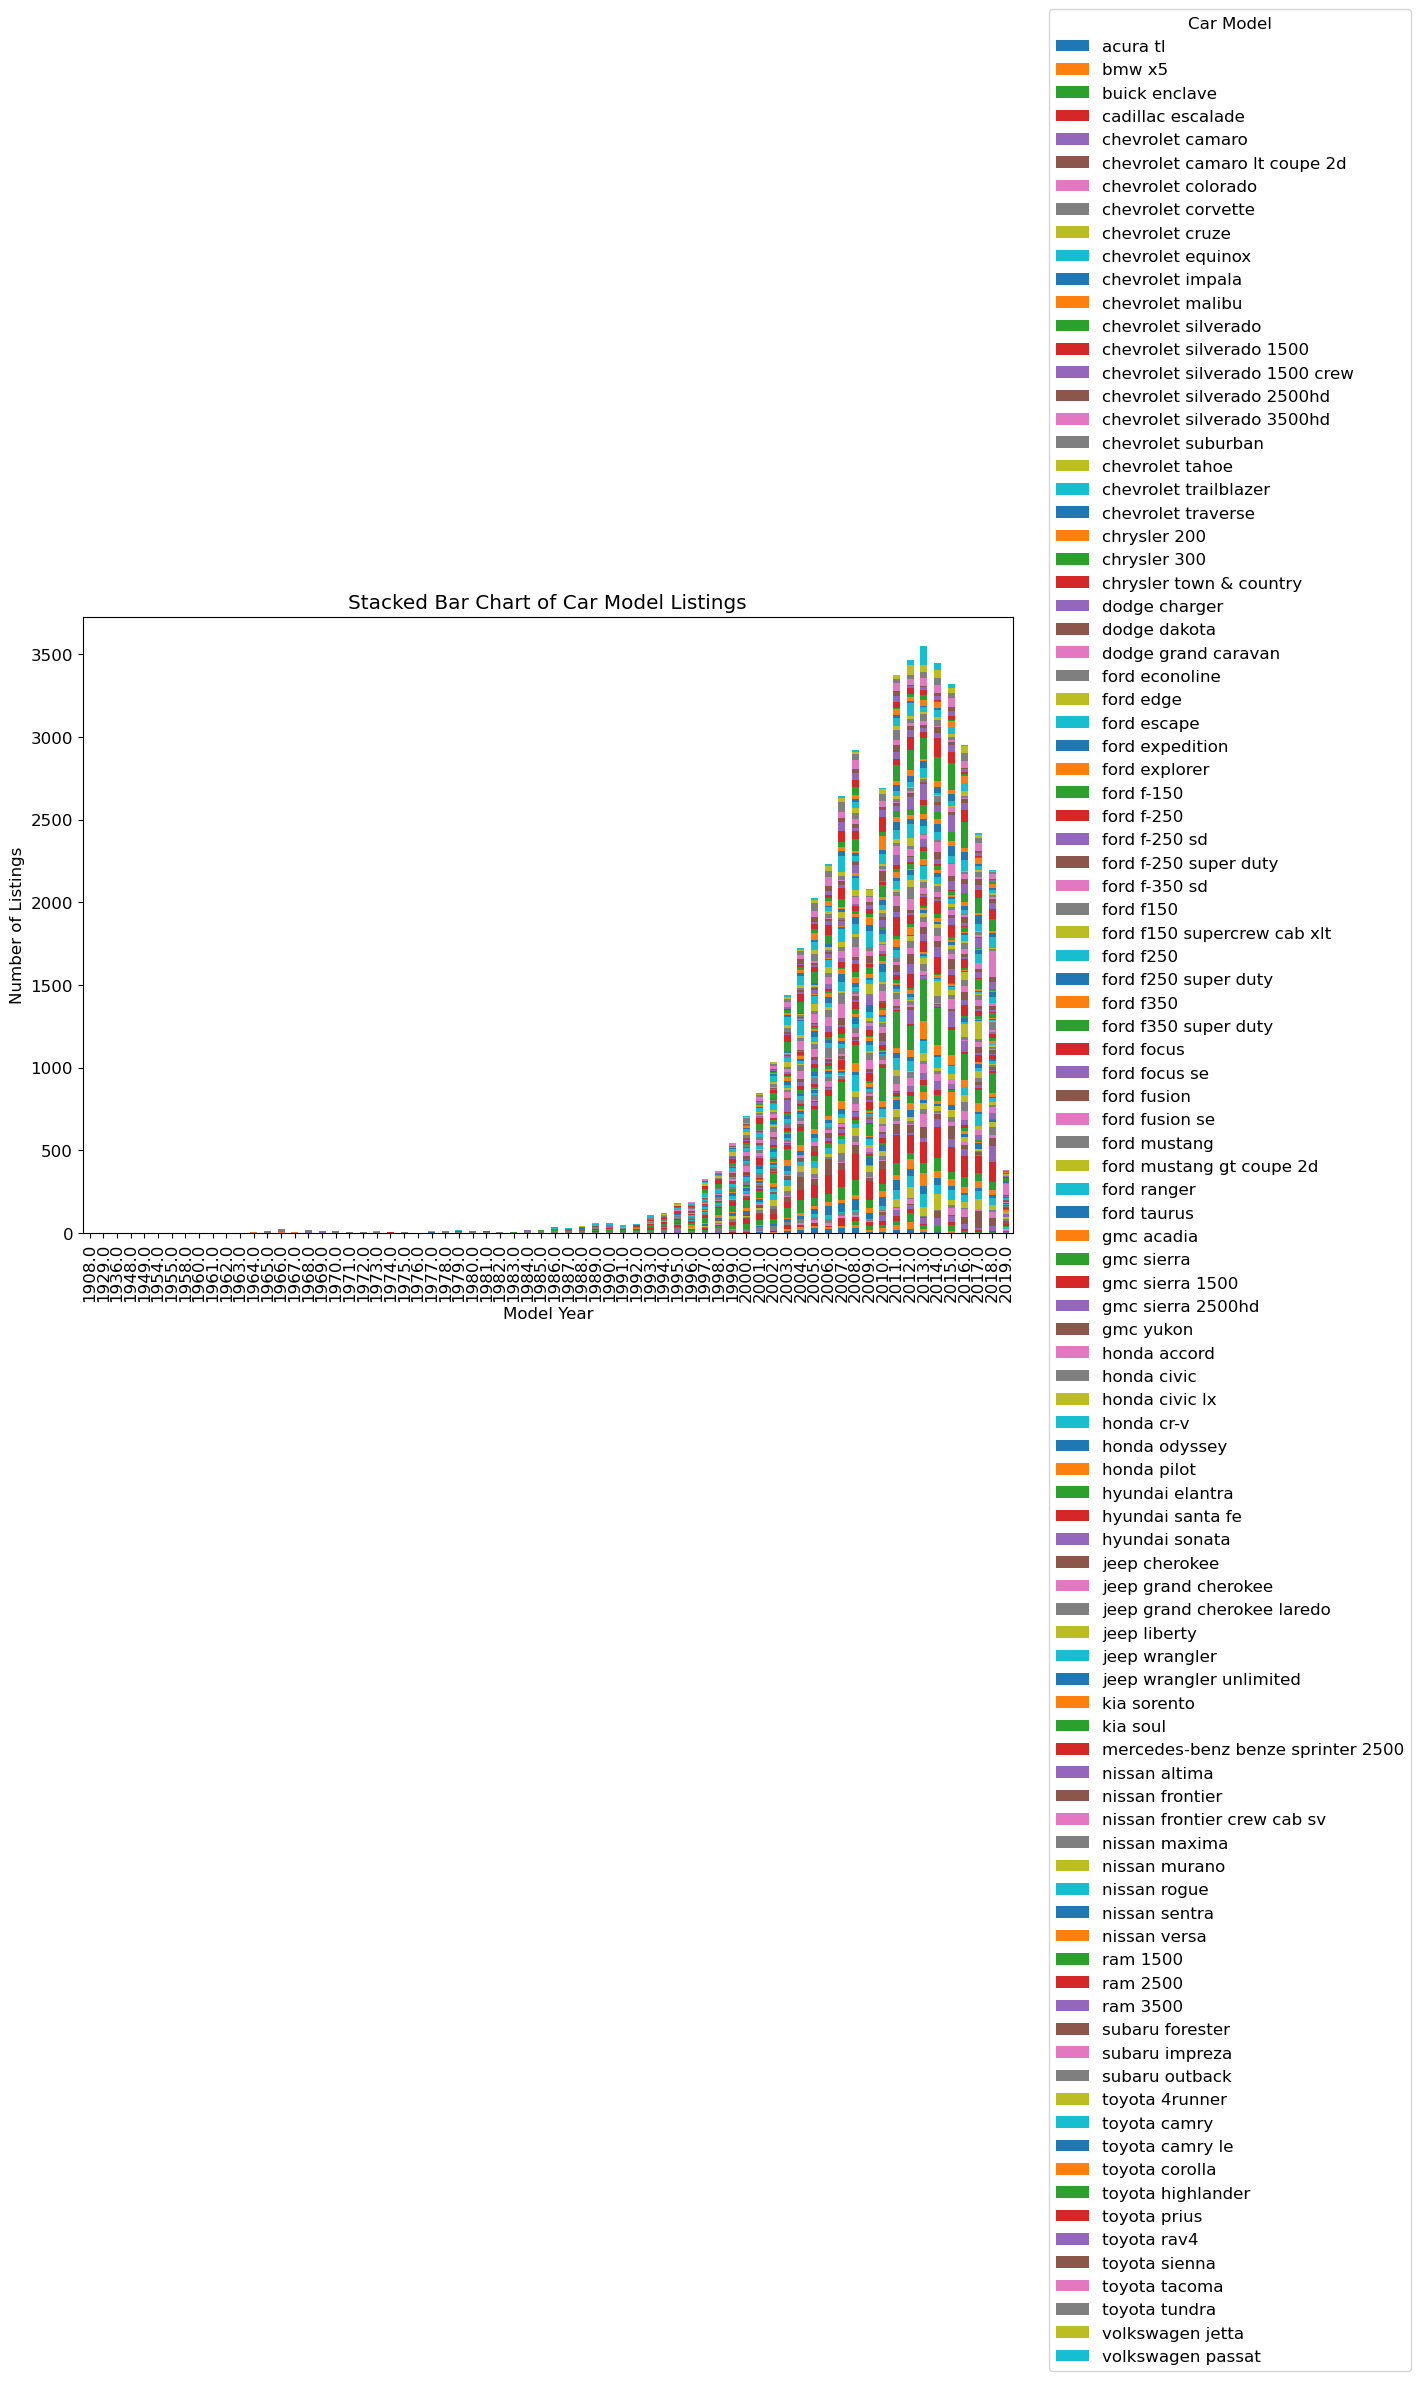

In [466]:
grouped_data = df.groupby(['model_year', 'model']).size().unstack(fill_value=0)

# Create the plot with proper tight layout
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting the stacked bar chart
grouped_data.plot(kind='bar', stacked=True, ax=ax1)
plt.xlabel('Model Year')
plt.ylabel('Number of Listings')
plt.title('Stacked Bar Chart of Car Model Listings')
plt.legend(title='Car Model', bbox_to_anchor=(1.03, 2), loc='upper left')
plt.show()

There seems to be a general upward trend in the total number of car listings across model years. This suggests an increase in the number of cars listed for sale over time. Some car models consistently have a higher number of listings throughout the years compared to others. These likely represent more popular models. Examples include models from Ford (F-150, Escape, Focus), Honda (Accord), and Toyota (Camry).
The Ford F-150 appears to be the most popular model overall, with the highest number of listings across most years.

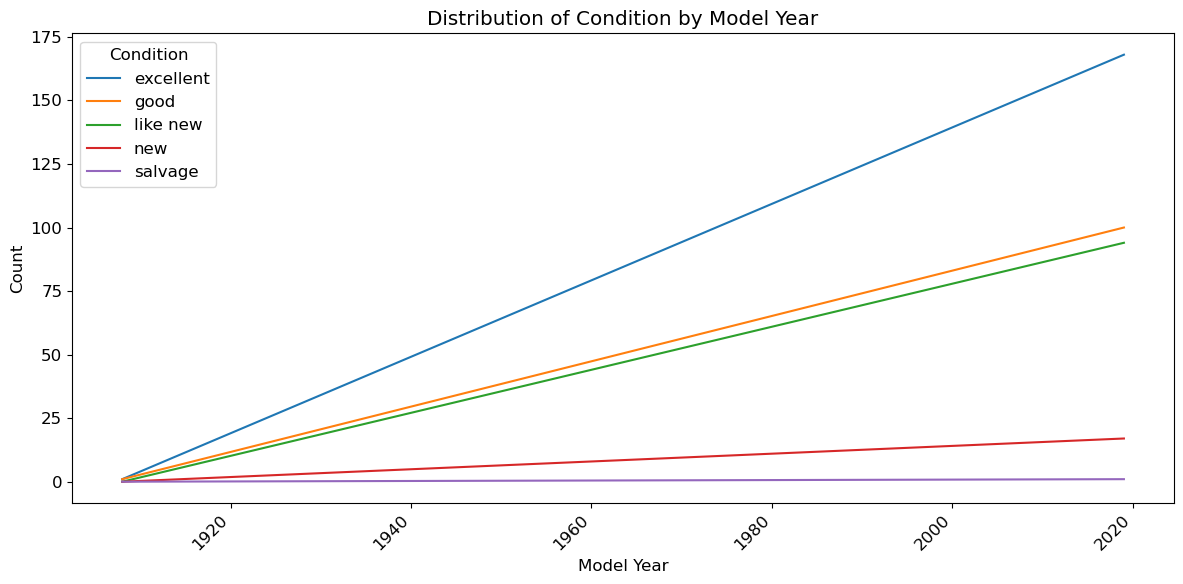

In [461]:
condition_by_year = df.groupby(['model_year', 'condition']).size().unstack(fill_value=0)

lowest = df['model_year'].dropna().min()
highest = df['model_year'].dropna().max()

df_filtered = df[df['model_year'].isin([lowest, highest])]

# Calculate the distribution of condition by model year
condition_by_year = df_filtered.groupby(['model_year', 'condition']).size().unstack(fill_value=0)


# Plot the line chart
condition_by_year.plot(kind='line', figsize=(12, 6))
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.title('Distribution of Condition by Model Year')
plt.legend(title='Condition')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

There seems to be a general upward trend in the total number of car listings across model years, from 2016 to 2020. This suggests an increase in the number of cars listed for sale over time.

Some car models consistently have a higher number of listings throughout the years compared to others. These likely represent more popular models. Examples include: Honda Accord, Toyota Camry, Toyota RAV4

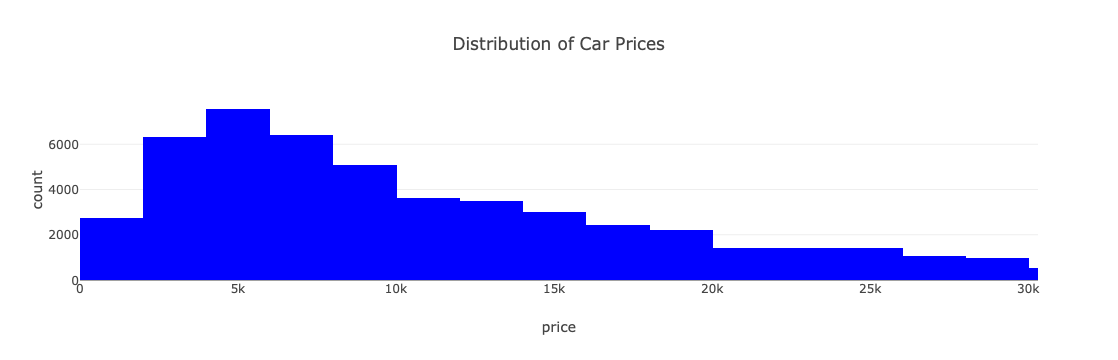

In [462]:
fig = px.histogram(df, x="price", title="Distribution of Car Prices", nbins=200, range_x=[df['price'].min(), df['price'].quantile(0.95)], color_discrete_sequence=['blue'])
fig.show()

It seems that there is a right-skewed distribution. The majority of cars fall into the lower price range, with a longer tail extending towards the higher end. This indicates that there are more affordable cars and a smaller number of luxury or high-performance cars that significantly inflate the average price.

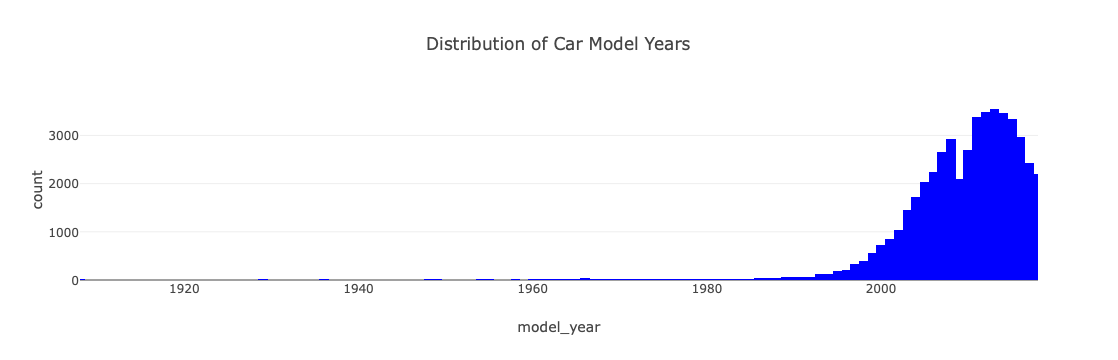

In [463]:
fig = px.histogram(df.dropna(subset=['model_year']), 
                   x="model_year", 
                   title="Distribution of Car Model Years", 
                   nbins=200, 
                   range_x=[df['model_year'].min(), df['model_year'].quantile(0.99)],color_discrete_sequence=['blue'] )                  
fig.show()

The bell curve shape suggests a normal distribution (with a peak in the middle and symmetrical tails on either side). However, the curve seems incomplete because it has a longer tail extending towards the left side (earlier years) with higher counts (up to 3000 models).

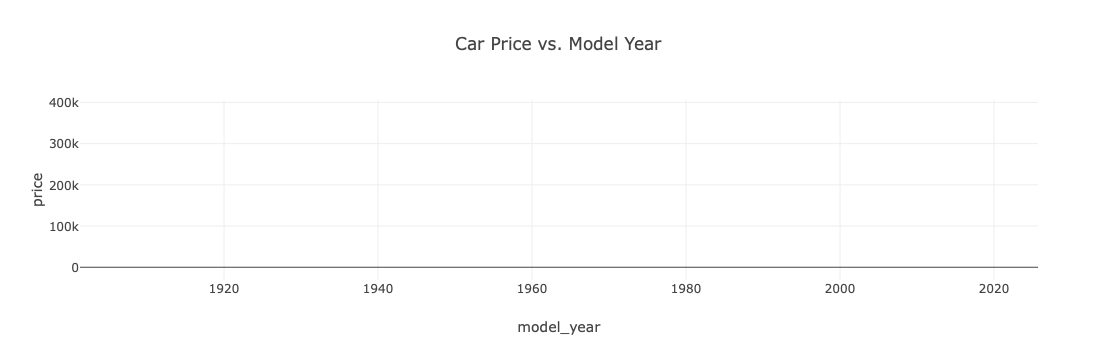

In [464]:
fig = px.scatter(df, x="model_year", y="price", title="Car Price vs. Model Year", color_discrete_sequence=['blue'])
fig.show()

It appears that the newer the car is the expensier it is as well.

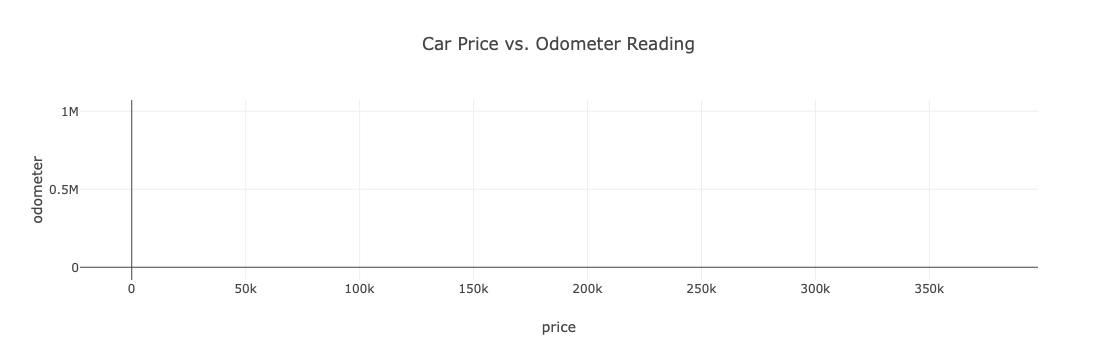

In [465]:
fig = px.scatter(df.dropna(subset=['odometer']), x="price", y="odometer", title="Car Price vs. Odometer Reading")
fig.show()

The price of the car is directly correlated to the odometer reading, the smaller it odometer reading the higher the chances the price of the car being higher